In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import caffe
import utils

from matplotlib import offsetbox
from sklearn import manifold, discriminant_analysis
from ipywidgets import interact
from train_places_net import get_split

# matplotlib config
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

caffe.set_device(0)
caffe.set_mode_gpu()

ITERS = 50000

In [2]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], y[i],
                 color=plt.cm.Set1(y[i] / 100.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [ ]:
labels = utils.load_labels()
with open(get_split('val'), 'r') as fh:
    all_y = np.array([int(x.split(" ")[1]) for x in fh.read().strip().split("\n")])

X = []
y = []
for i in range(100):
    print(i)
    idx = range(i * 100, (i + 1) * 100)
    net, transformer = utils.load_net(ITERS, idx, labels)
    out = net.forward()

    X.extend(net.blobs['fc7'].data)
    y.extend(all_y[idx])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

<IPython.core.display.Javascript object>


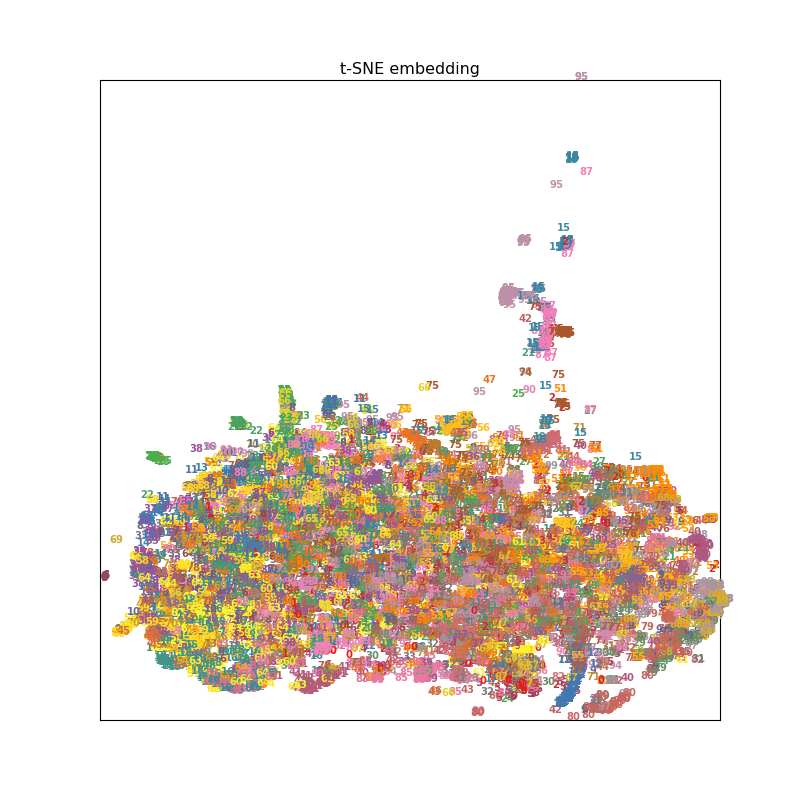

In [14]:
plot_embedding(X_tsne, y, "t-SNE embedding")
plt.savefig("writeup/figures/t-sne.png")

In [ ]:
X2 = np.array(X).copy()
X2.flat[::X2.shape[1] + 1] += 0.01  # Make X invertible
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)

<IPython.core.display.Javascript object>


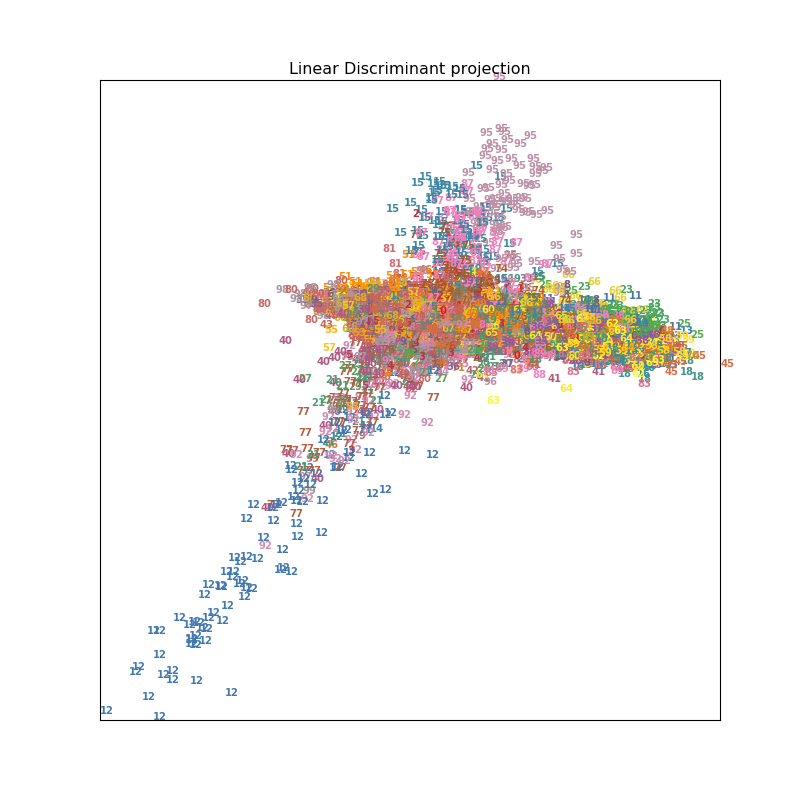

In [15]:
plot_embedding(X_lda, y, "Linear Discriminant projection")
plt.savefig("writeup/figures/linear-discriminant.png")

In [ ]:
X_iso = manifold.Isomap(30, n_components=2).fit_transform(X)

<IPython.core.display.Javascript object>


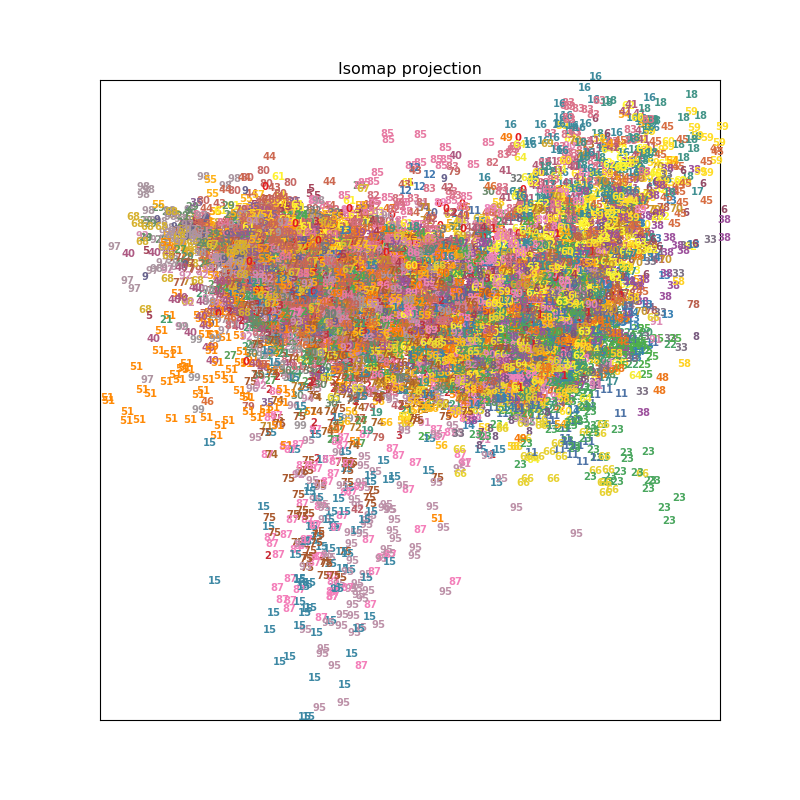

In [16]:
plot_embedding(X_iso, y, "Isomap projection")
plt.savefig("writeup/figures/isomap.png")

In [13]:
labels[62]

'/l/living_room'